In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem

# Part 1: Read in data and process

In [2]:
# define data directory
data_path = '../data/'

# load in the validated data for inhibition and killing
df = pd.read_excel(data_path + 'TrainingDataRound1_wValidation.xlsx')
print('num drugs: ' + str(len(df)))

# if there has been a third/fourth replicate, use the validation data to call hits
# for data points without replicates, call as hit only if both inhibition reps are below threshold
thresh = 0.2
secondchoice = list((df['Rep1_Inhibition'] < thresh) & (df['Rep2_Inhibition'] < thresh))
test = list(df['Inhibition Hit'])
corrected = []
for i in range(len(test)):
    if test[i] == 1.0:
        corrected.append(True)
    elif test[i] == 0.0:
        corrected.append(False)
    else:
        corrected.append(secondchoice[i])
df['hit_inh'] = corrected

# killing hit has already been manually validated via CFU plating so use "Killing Hit" column as ground truth
df['hit_kill'] = [True if x == 1.0 else False for x in list(df['Killing Hit'])]

# save cleaned dataframe
df = df[['SMILES', 'Name', 'hit_inh', 'hit_kill']]
df.to_csv('../out/data_for_ml.csv', index = False)
df

num drugs: 6720


,SMILES,Name,hit_inh,hit_kill
0,CCCC[C@H](CC)CNC(=N)N=C(N)NCCCCCCNC(N)=NC(=N)N...,alexidine,True,True
1,NC(Nc1ccc(Cl)cc1)=NC(=N)NCCCCCCNC(=N)N=C(N)Nc1...,chlorhexidine,True,True
2,CC[C@@H](C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@@H]([...,polymyxin-B-sulfate,True,True
3,OCCN[C@H]1CCCc2c1[nH]c1ccc(cc21)-c1ccccc1 |&1:...,casin,True,True
4,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,bekanamycin,True,True
...,...,...,...,...
6715,CC(O)(CC(O)=O)CC(O)=O,meglutol,False,False
6716,CCCCCCCCN[C@H](C)[C@@H](O)c1ccc(SC(C)C)cc1 |&1...,suloctidil,False,False
6717,CCc1nn(CCCN2CCN(CC2)c2cccc(Cl)c2)c(=O)n1CCOc1c...,nefazodone,False,False
6718,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,ribostamycin,False,False


In [3]:
# get information about the number of killing and inhibition hits
print(sum(df['hit_inh'] > 0))
print(sum(df['hit_kill'] > 0))

148
84


# Part 2: Visualize a couple hand-picked compounds

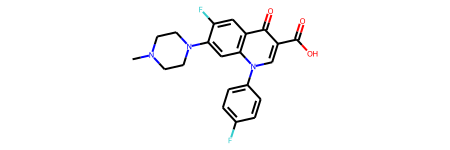

In [4]:
# hand pick difloxacin for visualization
t1 = df[df['Name'] == 'difloxacin']
Chem.MolFromSmiles(list(t1['SMILES'])[0])

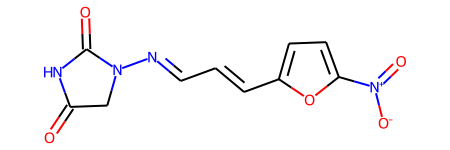

In [5]:
# hand pick furagin for visualization
t1 = df[df['Name'] == 'furagin']
Chem.MolFromSmiles(list(t1['SMILES'])[0])

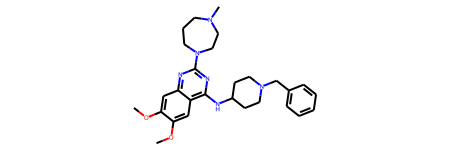

In [6]:
# hand pick BIX-01294 for visualization
t1 = df[df['Name'] == 'BIX-01294']
Chem.MolFromSmiles(list(t1['SMILES'])[0])

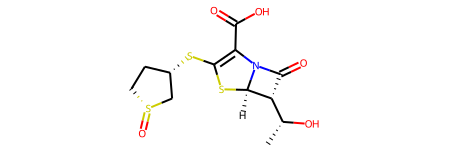

In [7]:
# hand pick sulopenem for visualization
t1 = df[df['Name'] == 'sulopenem']
Chem.MolFromSmiles(list(t1['SMILES'])[0])

# Part 3: Look at different classes of compounds

In [8]:
test = df[['SMILES', 'Name', 'hit_inh', 'hit_kill']]
test

# class a is not hits in inh or kill = expect the most here
classa = ~(test['hit_inh']) & ~(test['hit_kill'])
classamols = test[classa]
print('class a : ' + str(sum(classa)))

# class b is hits in inh but not kill
classb = (test['hit_inh']) & ~(test['hit_kill'])
classbmols = test[classb]
print('class b : ' + str(sum(classb)))

# class c is hits in kill but not inh
classc = ~(test['hit_inh']) & (test['hit_kill'])
classcmols = test[classc]
print('class c : ' + str(sum(classc)))

# class d is hits in both inh & kill
classd = (test['hit_inh']) & (test['hit_kill'])
classdmols = test[classd]
print('class d : ' + str(sum(classd)))

class a : 6549
class b : 87
class c : 23
class d : 61


In [9]:
classamols

,SMILES,Name,hit_inh,hit_kill
86,CCn1c2ccccc2c2cc(Nc3ccnc(NCCCN4CCOCC4)n3)ccc12,EHop-016,False,False
87,Oc1ccc(O)cc1,hydroquinone,False,False
91,C(Cc1c[nH]c2ccccc12)Nc1ccc(Nc2ccncc2)cc1,serdemetan,False,False
94,C(Nc1nc(NCc2ccccc2)c2ccccc2n1)c1ccccc1,DBeQ,False,False
95,CCNCCc1ccc(CN(CC)c2cc(OC)ccc2[C@@H]2CCc3cc(O)c...,elacestrant,False,False
...,...,...,...,...
6715,CC(O)(CC(O)=O)CC(O)=O,meglutol,False,False
6716,CCCCCCCCN[C@H](C)[C@@H](O)c1ccc(SC(C)C)cc1 |&1...,suloctidil,False,False
6717,CCc1nn(CCCN2CCN(CC2)c2cccc(Cl)c2)c(=O)n1CCOc1c...,nefazodone,False,False
6718,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,ribostamycin,False,False


# Part 4: Finalize data splits for ML

In [ ]:
# did not change paths here since I did not re-run - did not want randomness to get overwritten
test['hit_inh'] = [int(x) for x in list(test['hit_inh'])]
test['hit_kill'] = [int(x) for x in list(test['hit_kill'])]

# define as 80% train / 20% test set; within 80% train, will further separate into 80/10/10 train/val/test and do hyperparameter optimization on the 80% train set
perc_train = 0.8

# first define a positive sample as anything with activity in either inh or killing contexts
pos = test[~classa]
postrain = pos.sample(frac=perc_train)
postrainnames = list(postrain['SMILES'])
postest = pd.DataFrame()
for i, r in pos.iterrows():
    if r['SMILES'] not in postrainnames:
        postest = postest.append(r)

# negative is neither inhibitory nor killing
neg = test[classa]
negtrain = neg.sample(frac=perc_train)
negtrainnames = list(negtrain['SMILES'])
negtest = pd.DataFrame()
for i, r in neg.iterrows():
    if r['SMILES'] not in negtrainnames:
        negtest = negtest.append(r)

# make train and test dfs
traindf = pd.concat([postrain, negtrain])
testdf = pd.concat([postest, negtest])

# carrying over the exact train and test sets we used for model training
# don't run again because the different randomness would change the splits

#traindf.to_csv('../out/data_prep_for_ml_trainset.csv', index = False)
#testdf.to_csv('../out/data_prep_for_ml_testset.csv', index = False)
fulldf = pd.concat([traindf, testdf])
#fulldf.to_csv('../out/data_prep_for_ml_fullset.csv', index = False)

# Part 5: Scatterplot of inhibition vs killing

In [11]:
# grab just the average killing and inibition ODs for plotting
df = pd.read_excel(data_path + 'TrainingDataRound1_wValidation.xlsx')
df = df[['Mean_Inhibition', 'Mean_Killing']]
df

,Mean_Inhibition,Mean_Killing
0,0.071661,0.083945
1,0.135632,0.082339
2,0.167846,0.076781
3,0.766983,0.078405
4,0.076002,0.092234
...,...,...
6715,1.018585,1.551364
6716,0.982712,1.627268
6717,1.069913,1.687363
6718,1.068834,1.822382


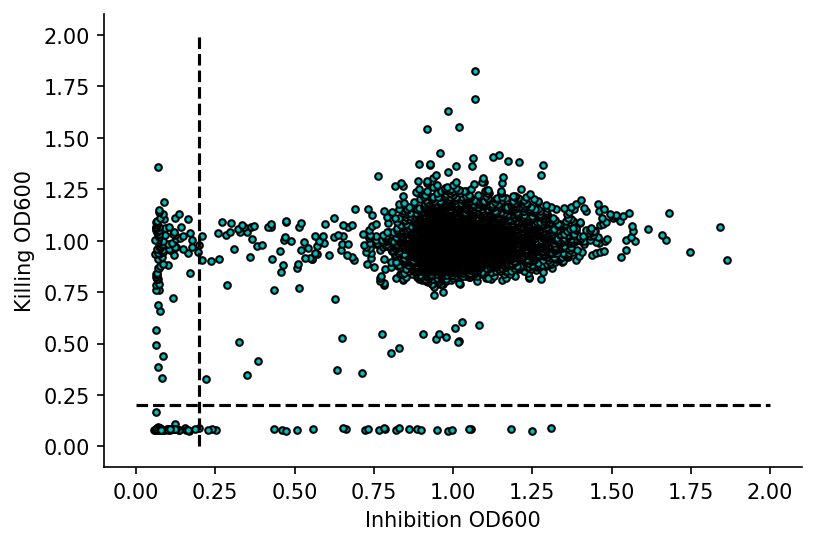

In [12]:
# plot avg inhibition OD vs avg killing OD
fig, ax = plt.subplots(dpi = 150)
plt.scatter(df['Mean_Inhibition'], df['Mean_Killing'], color = 'c', edgecolor = 'black', s =10)
plt.vlines(0.2, 0, 2, linestyles = 'dashed', color = 'k')
plt.hlines(0.2, 0, 2, linestyles = 'dashed', color = 'k')
plt.xlabel('Inhibition OD600')
plt.ylabel('Killing OD600')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('../figure_panels/1E_scatterplot.png')